In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df1 = pd.read_csv(f"./data/cpu_run1_int.csv")
df1["run"] = 1
df2 = pd.read_csv(f"./data/cpu_run2_int.csv")
df2["run"] = 2
df3 = pd.read_csv(f"./data/cpu_run3_int.csv")
df2["run"] = 3
df = pd.concat([df1, df2, df3])
data = df[['QPS', 'target', 'p95']].groupby("target")[['QPS', 'p95']].agg(qps_mean=("QPS", "mean"), p95_mean=('p95', "mean"), p95_err=('p95', "std"), qps_err=('QPS', "std")).reset_index()
data['p95_mean'] = data['p95_mean']


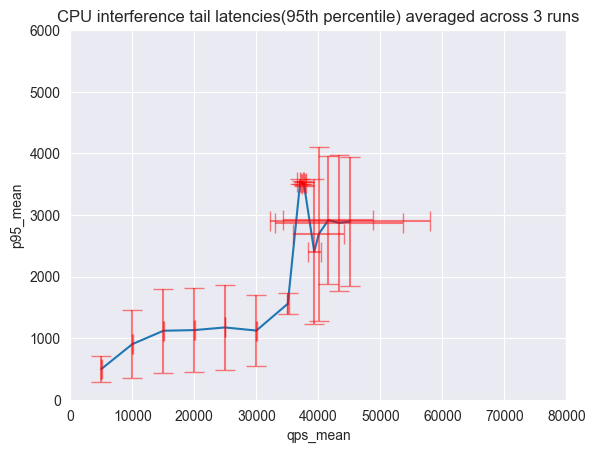

In [45]:
sns.set_style("darkgrid")
sns.lineplot(data, x='qps_mean', y='p95_mean')
plt.ylim(0, 6000)
plt.xlim(0, 80000)
plt.title("CPU interference tail latencies(95th percentile) averaged across 3 runs")
plt.errorbar(x=data['qps_mean'], y=data['p95_mean'], yerr=data['p95_err'],xerr=data['qps_err'], fmt='none', color='red', capsize=7, alpha=0.5)
plt.show()